# Exploratory data analysis

 <font size="3">Import libraries</font>


In [5]:
# import standard libraries
import json
import numpy as np
# import third-party libraries
from geopy.geocoders import Nominatim
import matplotlib
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from IPython.display import display
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# import local libraries

pd.options.display.max_columns = None

<font size="3">Import data</font>

In [6]:
movies = pd.read_csv('movies_metadata_cleaned.csv')
#ratings = pd.read_csv('ratings_small.csv')

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,6,12,30,32,60,62,64,66,68,70,72,74,76,78,80,82,84,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<font size="3">We observe that there are a lot of columns. This is because some movies have long listings of either genres, production companies, production countries, or spoken languages</font>

In [7]:
movies

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

In [8]:
# number of movies at the beginning
start_num_rows = np.shape(movies)[0]
start_num_cols = np.shape(movies)[1]
print('Our dataset has {} entries and {} columns'.format(start_num_rows, start_num_cols))

Our dataset has 45466 entries and 173 columns


<font size="3">The tremendous number of columns come from the initial cleaning of the dataset, where we have expanded cells that had more than one possible value.</font>

## Further cleaning

In [9]:
# make sure 'adult' column only has True or False
unique_adult = list(movies['adult'].unique())
print('Unique values in \'adult\' columns:')
for elt in unique_adult:
    print('> {} (type {})'.format(elt, type(elt)))
# there are some inconsistencies (some long strings and stringified booleans)
adult_todrop = [elt for elt in unique_adult if elt != False and elt != True and elt != 'False' and elt != 'True']

Unique values in 'adult' columns:
> False (type <class 'bool'>)
> False (type <class 'str'>)
> True (type <class 'str'>)
>  - Written by Ørnås (type <class 'str'>)
>  Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all. (type <class 'str'>)
>  Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche. (type <class 'str'>)
> True (type <class 'bool'>)


In [10]:
# take a look at strange rows in unique_adult
adult_todrop = movies[movies['adult'].isin(adult_todrop)]
adult_todrop

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We observe that the above rows are pretty weird. We drop them.</font>

In [11]:
movies = movies.drop(index = adult_todrop.index)

<font size="3">We transform the imdb_id column.</font>

In [12]:
display(movies[['imdb_id']].head())
movies['imdb_id'] = movies['imdb_id'].str.strip('tt0') # strip all leading tt and 0s

,imdb_id
0,tt0114709
1,tt0113497
2,tt0113228
3,tt0114885
4,tt0113041


<font size="3">We continue by converting columns to check for more inconsistencies or errors in the data.</font>

In [13]:
# convert 'adult' column to bool
movies['adult'] = movies['adult'].astype(bool) # runs without errors
# convert all columns representing ids to int
col_id = movies.filter(regex = '_.*id').columns
movies[col_id] = movies[col_id].fillna(value = -1) # workaround since nans cannot be converted to integers
movies[col_id] = movies[col_id].astype(int) # runs without errors
# convert some columns to float'
col_float = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies[col_float] = movies[col_float].astype(float) # runs without errors
# convert 'video' column to bool
movies['video'] = movies['video'].astype(bool) # runs without errors
# convert 'release_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

<font size="3">We then analyse the NaNs in each columns</font>

In [14]:
nulls = movies.iloc[:, 0:15].isnull().sum(axis = 0)
display(pd.DataFrame(nulls).T)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,0,0,0,0,11,0,3,87,3,260,84,3,0,3,3


In [15]:
todrop = movies[movies['popularity'].isnull()] # these rows are too incomplete, we drop them
display(todrop)
movies = movies.drop(index = todrop.index)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We have enough data to drop some rows that have incomplete data in the first columns (adult ~ vote_count)</font>

In [16]:
nulls_todrop = nulls[nulls.between(1, max(nulls))].index
for col in nulls_todrop:
    todrop = movies[movies[col].isnull()]
    movies = movies.drop(index = todrop.index)
print('Our dataset now has {} entries compared to {} in the beginning.'.format(len(movies), start_num_rows))

Our dataset now has 45043 entries compared to 45466 in the beginning.


In [17]:
# Convert boolean columns to integers (False = 0, True = 1)
bool_col = movies.dtypes[movies.dtypes == 'bool'].index
movies[bool_col] = movies[bool_col].astype(int)

In [18]:
# replace release date by the year and month, we don't care about the day
movies['release_year'] = pd.DatetimeIndex(movies['release_date']).year
movies['release_year'] = movies['release_year'].astype('int')
movies['release_month'] = pd.DatetimeIndex(movies['release_date']).month
movies['release_month'] = movies['release_month'].astype('int')
# drop release date
movies = movies.drop(columns = 'release_date')

In [19]:
# count number of possibilities of status
print(movies['status'].value_counts())
# Rumored, post production, in production and planned movies can be removed as they only 
# represent a small fraction of all movies. We keep only released
movies = movies[movies['status'] == 'Released']

Released           44686
Rumored              229
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: status, dtype: int64


<font size="3">Indeed, this is a good assumption. Movies like Avatar 2 who are in production do not have sufficient data in terms of revenue and budget to actually be useful.</font>

In [20]:
# we drop status column
movies = movies.drop(columns = 'status')

# Info of dataset

In [21]:
to_describe = movies.drop(columns = movies.filter(regex = 'genres|production|language|collection|title|id').columns)
to_describe.describe()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month
count,44686.000000,4.468600e+04,44686.000000,4.468600e+04,44686.000000,44686.000000,44686.000000,44686.000000,44686.000000
mean,0.269368,4.295965e+06,2.959225,1.140190e+07,94.323099,5.640326,111.685897,1991.794947,6.463322
std,0.443637,1.756607e+07,6.040798,6.487003e+07,38.297097,1.892305,495.349516,24.086647,3.624150
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,1.000000
25%,0.000000,0.000000e+00,0.402182,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,3.000000
50%,0.000000,0.000000e+00,1.151609,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,7.000000
75%,1.000000,0.000000e+00,3.777141,0.000000e+00,107.000000,6.800000,35.000000,2010.000000,10.000000
max,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2017.000000,12.000000


<font size="3">Unusual data: popularity with low quantiles with at least one outlier (max at 547). Same thing for runtime (one movie lasts 21 hours!). For the revenue and budget columns, the 25 to 75% percentiles are close to 0, this is because there are A LOT of movies that have no budget and/or generated no revenue.</font>

In [22]:
max_popularity = movies.sort_values('popularity', ascending = False)
max_popularity.head() # actually the popularity seems normal

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

In [23]:
max_runtime = movies.sort_values('runtime', ascending = False)
max_runtime.head() # actually the runtime is also normal, Centennial is actually a very lengthy miniseries!

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

In [24]:
max_votecount = movies.sort_values('vote_count', ascending = False)
max_votecount.head() # vote count seems normal as well ! 

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

<font size="3">Unusual data: Release year seems normal with first movie to be present in 1874 according to our dataset. Moreover, release months are pretty well distributed (there is no sign that one period is more favorable to release a movie). Adult is between 0 and 1. Vote average seems to range from 0 to 10. Highest budget seems normal. According to Wikipedia, the most expensive movie produced was Pirates of the Caribbean: On Stranger Tides. This coincides with our dataset.</font>

In [25]:
max_budget = movies.sort_values('budget', ascending = False)
max_budget.head()

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

In [26]:
max_revenue = movies.sort_values('revenue', ascending = False)
max_revenue.head() # seems normal as well, Avatar, Start Wars, and Titanic are the movies with the most revenue
# as of whatever year this dataset was released. Today, the highest-grossing movie is The Avengers and not Avatar 
# anymore.

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

## Analysis of genres

In [27]:
# we can drop the id of genres and re-econde later
genres_id = movies.filter(regex = 'genres_id_.*')
movies = movies.drop(columns = genres_id.columns)

In [28]:
# identify movies without a genre
nulls = movies.filter(regex = 'genres_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a genre. Can we can drop them.?'.format(nulls[0]))
# movies = movies[movies['genres_name_0'].notna()]

There are 2260 movies without a genre. Can we can drop them.?


In [29]:
# let's see how many genres movies have on average
genres_name = movies.filter(regex = 'genres_name_.*')
avg_genres = genres_name.count(axis = 1).mean()
print('Number of genres on average over all movies: {}'.format(avg_genres))

Number of genres on average over all movies: 2.014590699547957


In [30]:
# we identify all possible values for genres
genres_name = movies.filter(regex = 'genres_name_.*')
genres_name_stacked = genres_name.stack().reset_index(drop = True)
genres_name_unique = genres_name_stacked.drop_duplicates().reset_index(drop = True)
display(pd.DataFrame(genres_name_unique).T)
print('There are {} different genres'.format(len(genres_name_unique)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie


There are 20 different genres


In [31]:
# distribution of genres
genres_name_stacked.value_counts()

Drama              20017
Comedy             12991
Thriller            7560
Romance             6654
Action              6536
Horror              4633
Crime               4276
Documentary         3849
Adventure           3467
Science Fiction     3006
Family              2730
Mystery             2451
Fantasy             2283
Animation           1909
Foreign             1587
Music               1587
History             1388
War                 1314
Western             1037
TV Movie             749
dtype: int64

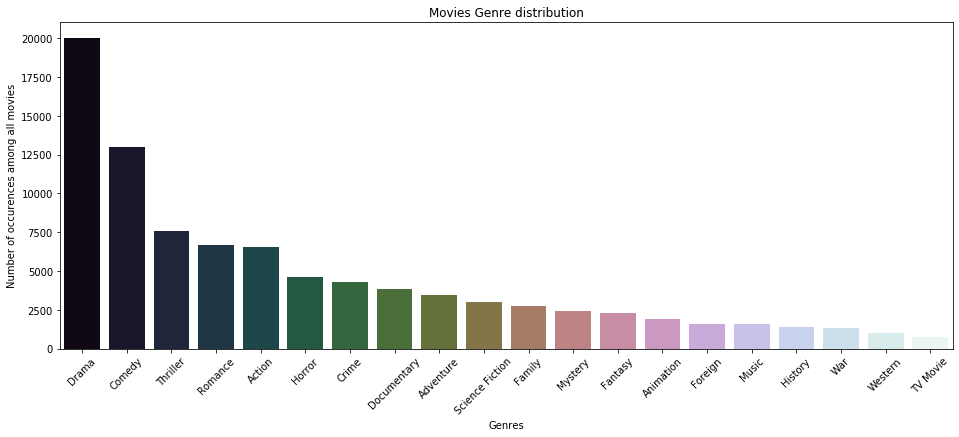

In [32]:
fig, ax = plt.subplots(figsize = (16, 6))
genres_palette = sns.color_palette('cubehelix', len(genres_name_unique))
g = sns.countplot(genres_name_stacked, ax = ax, order = genres_name_stacked.value_counts().index,
                 palette = genres_palette)
ax.set(xlabel = 'Genres', ylabel = 'Number of occurences among all movies')
ax.set_title('Movies Genre distribution')
_ = plt.xticks(rotation = 45)

In [33]:
# we add a column of genres per movie as a weight, the more the movie has popular genres, the higher 
# the weighted value (in terms of genres) of the movie
# compute weights
genres_weight = genres_name_stacked.value_counts(normalize = True)
genres_name_weighted = genres_name.replace(genres_weight)
movies['genres_weight'] = genres_name_weighted.sum(axis = 1)

2260 movies have 0 genres
14257 movies have 1 genres
14322 movies have 2 genres
9487 movies have 3 genres
3349 movies have 4 genres
830 movies have 5 genres
154 movies have 6 genres
24 movies have 7 genres
3 movies have 8 genres


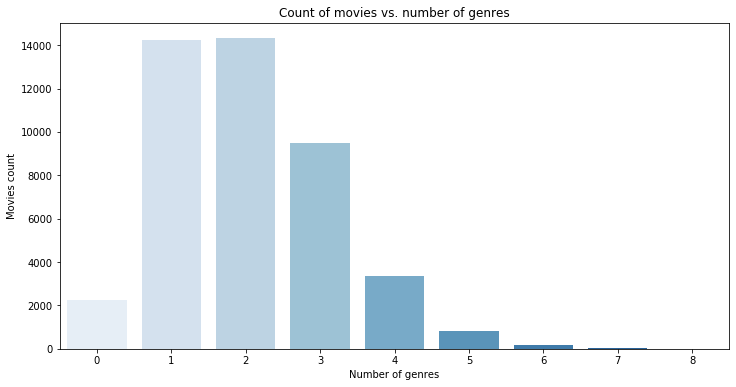

In [34]:
# we also add column with number of genres for each movie
genres_name = movies.filter(regex = 'genres_name_.*')
movies['genres_num'] = genres_name.count(axis = 1)
for i, c in movies['genres_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} genres'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['genres_num'], 
                  palette = sns.color_palette("Blues", len(movies['genres_num'].value_counts())))
_ = ax.set(xlabel = 'Number of genres', ylabel = 'Movies count')
_ = ax.set_title('Count of movies vs. number of genres')

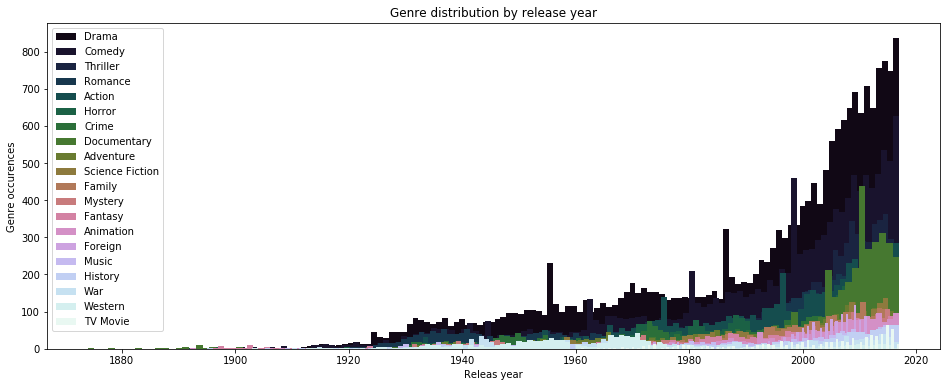

In [35]:
# plot some data on genres
fig, ax = plt.subplots(figsize = (16, 6))
genres_name_year = movies.filter(regex = '(genres_name_.*)|release_year') 
genres_name = movies.filter(regex = 'genres_name_.*')
for i, genre in enumerate(genres_name_stacked.value_counts().index):
    temp = genres_name_year[(genres_name_year[genres_name.columns] == genre).any(axis = 1)]
    ax.hist(temp['release_year'], 120, stacked = True, color = genres_palette[i], label = genre,
            range = (temp['release_year'].min(), temp['release_year'].max()))
_ = plt.legend()
_ = ax.set_xlabel('Releas year')
_ = ax.set_ylabel('Genre occurences')
_ = ax.set_title('Genre distribution by release year')

<font size="3">We observe that all genres have gained popularity over the years except maybe War and Western genres which have decreased and had a peak of popularity after World War 2. We also see that movies production has increased in the past years.</font>

## Analysis of production companies

In [36]:
# we can drop the id of production companies and re-econde later
company_id = movies.filter(regex = 'production_companies_id_.*')
movies = movies.drop(columns = company_id.columns)

In [37]:
# identify movies without a production company
nulls = movies.filter(regex = 'production_companies_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a production company. Can we drop them?'.format(nulls[0]))

There are 11403 movies without a production company. Can we drop them?


In [38]:
# let's see how many production companies movies have on average
company_name = movies.filter(regex = 'production_companies_name_.*')
avg_company = company_name.count(axis = 1).mean()
print('Number of production companies on average over all movies: {}'.format(avg_company))

Number of production companies on average over all movies: 1.5649420400125318


In [39]:
# we identify all possible values for production companies
company_name = movies.filter(regex = 'production_companies_name_.*')
company_name_stacked = company_name.stack().reset_index(drop = True)
company_name_unique = company_name_stacked.drop_duplicates().reset_index(drop = True)
print('There are {} different production companies!'.format(len(company_name_unique)))

There are 23361 different production companies!


In [40]:
# get most popular production companies
num_most_popular = 30
print('{} most popular production companies (values: produced films)'.format(num_most_popular))
pd.DataFrame(company_name_stacked.value_counts()[:num_most_popular])

30 most popular production companies (values: produced films)


,0
Warner Bros.,1247
Metro-Goldwyn-Mayer (MGM),1075
Paramount Pictures,997
Twentieth Century Fox Film Corporation,834
Universal Pictures,827
Columbia Pictures Corporation,447
Canal+,435
Columbia Pictures,429
RKO Radio Pictures,290
United Artists,276


<font size="3">We see that some companies appear two times (Walt Disney Productions and Walt Disney Pictures). Is this a rebranding factor or really two studios? Moreover, we saw that Pixar Animation Studios appeared in the beginning of the EDA. They are now a subsidiary of Walt Disney Studios and were part of Lucas Film in the past (which is also now part of Walt Disney). We do not have more information on how production companies are counted for each movie over time.</font>

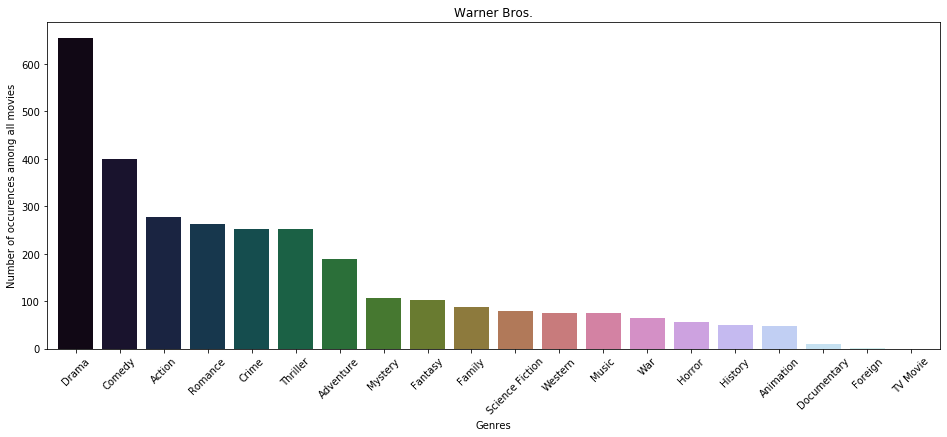

In [41]:
# plot some data on production companies (change company index)
fig, ax = plt.subplots(figsize = (16, 6))
company_index = 0
this_company = company_name_stacked.value_counts().index[0]
genres_company = movies.filter(regex = '(genres_name_.*)|(production_companies_name_.*)')
company_name = movies.filter(regex = 'production_companies_name_.*')
genres_name = movies.filter(regex = 'genres_name_.*')
genres_this_company = genres_company[(genres_company[company_name.columns] == this_company).any(axis = 1)]
genres_this_company = genres_this_company[genres_name.columns]
genres_count = pd.Series(index = genres_name_stacked.value_counts().index, data = 0)
for col in genres_this_company:
    temp = genres_this_company[col].value_counts()
    genres_count = pd.concat([genres_count, temp], axis = 1)
genres_count = genres_count.sum(axis = 1).sort_values(ascending = False)
_ = genres_count.plot.bar(genres_count, ax = ax, color = genres_palette, rot = 45, width = 0.8)
_ = ax.set(xlabel = 'Genres', ylabel = 'Number of occurences among all movies', title = this_company)

<font size="3">The most popular companies seems to follow the general trend, which is normal since they are the ones to create the trend. Production companies such as Arte (around index 100) is an outlier of the trend with noticeable amount of documenaries.</font>

11403 movies have 0 production companies
16424 movies have 1 production companies
7890 movies have 2 production companies
4676 movies have 3 production companies
1931 movies have 4 production companies
942 movies have 5 production companies
561 movies have 6 production companies
309 movies have 7 production companies
177 movies have 8 production companies
133 movies have 9 production companies
67 movies have 10 production companies
42 movies have 11 production companies
35 movies have 12 production companies
19 movies have 13 production companies
16 movies have 14 production companies
9 movies have 15 production companies
20 movies have 16 production companies
7 movies have 17 production companies
3 movies have 18 production companies
5 movies have 19 production companies
5 movies have 20 production companies
4 movies have 21 production companies
3 movies have 22 production companies
1 movies have 24 production companies
1 movies have 25 production companies
3 movies have 26 production

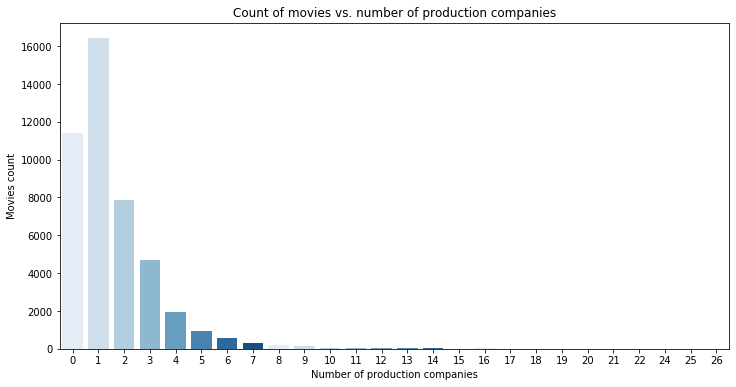

In [42]:
# we add column with number of production companies for each movie
company_name = movies.filter(regex = 'production_companies_name_.*')
movies['production_companies_num'] = company_name.count(axis = 1)
for i, c in movies['production_companies_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} production companies'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['production_companies_num'], 
                  palette = sns.color_palette("Blues", 8))
_ = ax.set(xlabel = 'Number of production companies', ylabel = 'Movies count', title ='Count of movies vs. number of production companies')

In [43]:
# print some interesting information
max_company = movies[movies['production_companies_num'] == movies['production_companies_num'].max()]
print('There are {} movies with {} production companies!'.format(len(max_company), 
                                                                 movies['production_companies_num'].max()))
max_company

There are 3 movies with 26 production companies!


,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_name_0,genres_name_1,genres_name_2,genres_name_3,genres_name_4,genres_name_5,genres_name_6,genres_name_7,production_companies_name_0,production_companies_name_1,production_companies_name_2,production_companies_name_3,production_companies_name_4,production_companies_name_5,production_companies_name_6,production_companies_name_7,production_companies_name_8,production_companies_name_9,production_companies_name_10,production_companies_name_11,production_companies_name_12,production_companies_name_13,production_companies_name_14,production_companies_name_15,production_companies_name_16,production_companies_name_17,production_companies_name_18,production_companies_name_19,production_companies_name_20,production_companies_name_21,production_companies_name_22,production_companies_name_23,production_companies_name_24,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1_11,spoken_languages_name_11,spoken_languages_iso_639_1_12,spoken_languages_name_12,spoken_languages_iso_639_1_13,spoken_languages_name_13,spoken_languages_iso_639_1_14,spoken_languages_name_14,spoken_languages_iso_639_1_15,spoken_languages_name_15,spoken_languages_iso_639_1_16,spoken_languages_name_16,spoken_languages_iso_639_1_17,spoken_languages_name_17,spoken_languages_iso_639_1_18,spoken_languages_name_18,release_year,release_month,genres_weight,genres_num,production_companies_num
3786,0,12800000.0,16,168629,en,Dancer in the Dark,10.684806,40031879.0,140.0,Dancer in the Dark,0,7.7,392.0,498,Heart of Gold Collection,Drama,Crime,Music,NaN,NaN,NaN,NaN,NaN,Fine Line Features,Zentropa Entertainments,Danmarks Radio (DR),SVT Drama,Arte,Memfis Film,France 3 Cinéma,Angel fi

<font size="3">These movies seem to be European collaborations that group various countries and various production companies.</font>

## Analysis of production countries

In [44]:
# we can drop the iso certification name of production countries and re-econde later
country_iso = movies.filter(regex = 'production_countries_iso_.*')
movies = movies.drop(columns = country_iso.columns)

In [45]:
# identify movies without a production country
nulls = movies.filter(regex = 'production_countries_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a production country. Can we can drop them?'.format(nulls[0]))

There are 5981 movies without a production country. Can we can drop them?


In [46]:
# let's see how many production countries movies have on average
country_name = movies.filter(regex = 'production_countries_name_.*')
avg_country = country_name.count(axis = 1).mean()
print('Number of production countries on average over all movies: {}'.format(avg_country))

Number of production countries on average over all movies: 1.0932954392874725


In [47]:
# we identify all possible values for production countries
country_name = movies.filter(regex = 'production_countries_name_.*')
country_name_stacked = country_name.stack().reset_index(drop = True)
country_name_unique = country_name_stacked.drop_duplicates().reset_index(drop = True)
print('There are {} different production countries!'.format(len(country_name_unique)))

There are 160 different production countries!


In [48]:
# get most popular production countries
num_most_popular = 10
print('{} most popular production countries (values: produced films)'.format(num_most_popular))
country_name_value_counts = country_name_stacked.value_counts()
country_name_value_counts_norm = country_name_stacked.value_counts()/sum(country_name_value_counts)
pd.DataFrame(country_name_value_counts[:num_most_popular])

10 most popular production countries (values: produced films)


,0
United States of America,21006
United Kingdom,4070
France,3882
Germany,2203
Italy,2115
Canada,1742
Japan,1639
Spain,938
Russia,898
India,820


<font size="3">As one could guess, the most popular production countries are the USA, UK, and France, among other big nations. </font>

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


GeocoderInsufficientPrivileges: HTTP Error 403: Forbidden

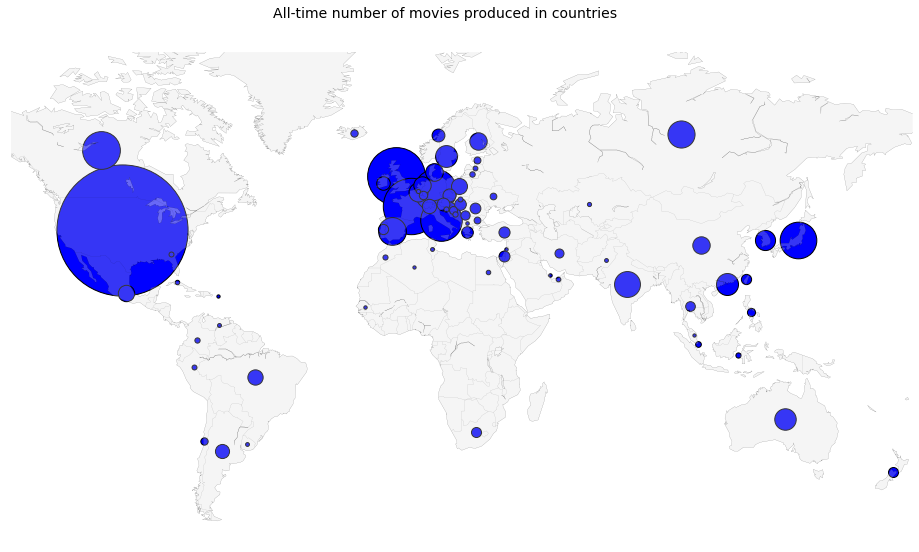

In [50]:
# plot map with number of movies produced
fig, ax = plt.subplots(figsize = (18, 9))
fig.suptitle('All-time number of movies produced in countries', fontsize = 14, y = 0.95)

m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read gps coordinates first
with open('gps_coordinates.json') as f:
    gps_coordinates = json.load(f)

# get gps coordinates of countries
geolocator = Nominatim(user_agent = 'specify_your_app_name_here', timeout = 10)
for country in country_name_value_counts[:160].index:
    if country in gps_coordinates:
        x, y = gps_coordinates[country]
    else:
        location = geolocator.geocode(country)
        try:
            coordinates = (location.latitude, location.longitude)
            x, y = m(coordinates[1], coordinates[0])
            gps_coordinates[country] = (x, y)
        except: # if the country does not exist?
            continue
    
    plt.scatter(x, y, color = 'blue', s = country_name_value_counts_norm[country]*4e4, 
                alpha = 1, marker = 'o', linewidth = 1, edgecolors = 'black')
    
# write gps coordinates
with open('gps_coordinates.json', 'w') as f:
    json.dump(gps_coordinates, f)

<font size="3">There are a lot of countries where a small number of movies have been produced. This is either independently or in colloboration with a country that is knowledgable in film production and wanted an exotic/genuine movie set. For example, Beauty and the Beast (2017) was filmed entirely in Great Britain but was produced by American film production companies (both countries appear in the column production_countries). </font>

In [51]:
# plot map of countries and average popularity
# get average popularity per country
popularity_country = movies.filter(regex = '(production_countries_name_.*)|(popularity)')
country_name = movies.filter(regex = 'production_countries_name_.*')
popularity = movies.filter(regex = 'popularity')
avg_popularity_countries = {}
for country in country_name_value_counts.index:
    popularity_this_country = popularity_country[(popularity_country[country_name.columns] == country).\
                                             any(axis = 1)]
    popularity_this_country = popularity_this_country[popularity.columns]
    if len(popularity_this_country) > 10: # remove outliers, countries that have high popularity with little movies
        avg_popularity_this_country = popularity_this_country.mean().values[0]
        avg_popularity_countries[country] = avg_popularity_this_country

max_pop = max(avg_popularity_countries.values())
min_pop = min(avg_popularity_countries.values())

In [52]:
# useful color selector from gradient of colors
def color_fader(c1, c2, mix = 0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


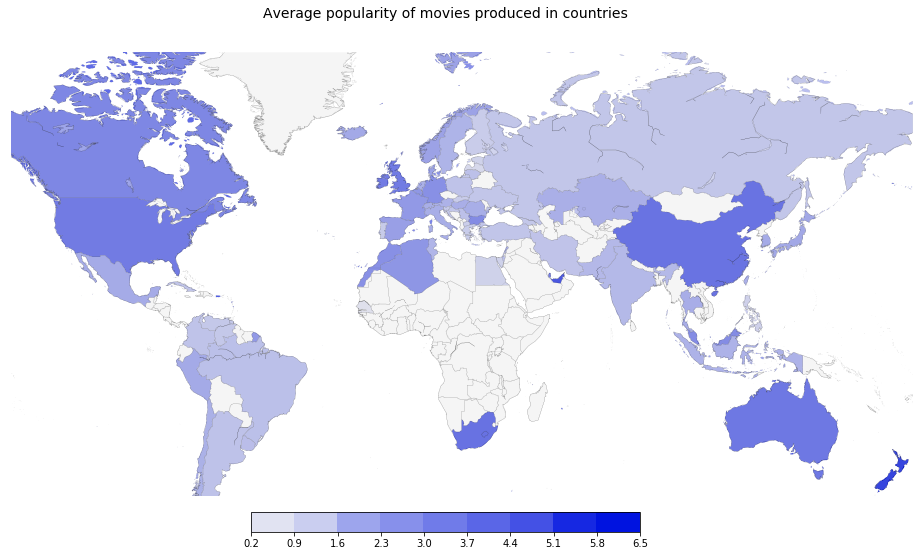

In [53]:
# the actual plot
shapefile = 'ne_10m_admin_0_countries_lakes'

# read shapes
fig, ax = plt.subplots(figsize = (18, 9))
fig.suptitle('Average popularity of movies produced in countries', 
             fontsize = 14, y = 0.95)

m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read shapes
m.readshapefile(shapefile, 'units', color = '#444444', linewidth = 0.05)

# define start and end colors
c_start = '#e1e3f2'
c_end = '#0013e0'

for info, shape in zip(m.units_info, m.units):
    country = info['NAME'] # some countries not found???
    
    if country in avg_popularity_countries:
        c_factor = (avg_popularity_countries[country] - min_pop)/(max_pop - min_pop)
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color_fader(c_start, c_end, c_factor))
        ax.add_collection(pc)
        
num_bound = 10
ax.axhspan(0, 1000 * 1800, facecolor = 'w', edgecolor = 'w', zorder = 2)
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
scheme = [color_fader(c_start, c_end, i/num_bound) for i in range(0,num_bound+1)]
cmap = mpl.colors.ListedColormap(scheme)
bins = np.linspace(min_pop, max_pop, num_bound)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap = cmap, ticks = bins, boundaries = bins, 
                               orientation = 'horizontal')
_ = cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

<font size="3">We have filtered out countries which have produced 10 or less movies since they can easily deceive the scale if they produced one block-buster (perhaps in collaboration with a country that has produced numerous movies). Countries that have produced a lot of movies are not the most popular on average. This is logical from the fact that they will produce many bad movies as well. Some countries are very popular, for example New Zealand which is probably due to the Lord of the Rings trilogy. Another popular country like South Africa might be due to safety and beautiful landscapes. Indeed, movies such as Avengers, District 9, Mad Max were (partly) set in South Africa. This is the same for the UAE, popular movies that are (partly) set there are Mission Impossible: Fallout, Star Trek Beyond, Furious 7, Star Wars: The Force Awaken among other popular movies.</font>

In [54]:
# we add a column of production countries per movie as a weight, the more the movie has popular production countries, the higher 
# the total weight of the movie
# compute weights
country_weight = country_name_stacked.value_counts(normalize = True)
country_name_weighted = country_name.replace(country_weight)
movies['production_countries_weight'] = country_name_weighted.sum(axis = 1)

5981 movies have 0 production countries
31744 movies have 1 production countries
4830 movies have 2 production countries
1451 movies have 3 production countries
461 movies have 4 production countries
150 movies have 5 production countries
39 movies have 6 production countries
12 movies have 7 production countries
6 movies have 8 production countries
6 movies have 9 production countries
1 movies have 10 production countries
2 movies have 11 production countries
1 movies have 12 production countries
1 movies have 15 production countries
1 movies have 25 production countries


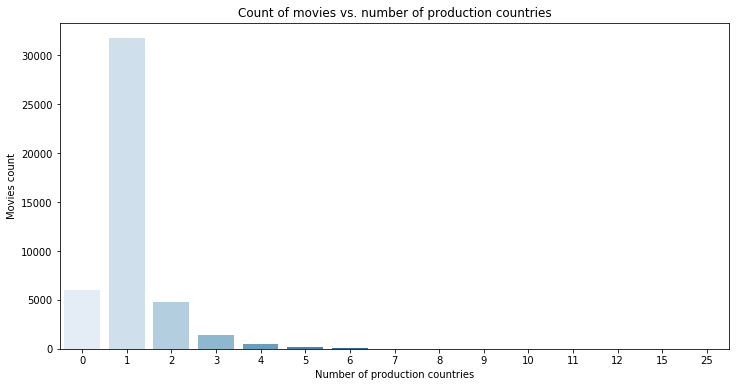

In [55]:
# we add column with number of production countries for each movie
country_name = movies.filter(regex = 'production_countries_name_.*')
movies['production_countries_num'] = country_name.count(axis = 1)
for i, c in movies['production_countries_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} production countries'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['production_countries_num'], 
                  palette = sns.color_palette("Blues", 8))
_ = ax.set(xlabel = 'Number of production countries', ylabel = 'Movies count', title ='Count of movies vs. number of production countries')

<font size="3">Below another interesting plot of average budget among all movies per country. We assume the budget column is in American dollars and the same for all movies. </font>

In [ ]:
# plot countries by average budget
# get average budget per country
budget_country = movies.filter(regex = '(production_countries_name_.*)|(budget)')
country_name = movies.filter(regex = 'production_countries_name_.*')
budget = movies.filter(regex = 'budget')
avg_budget_countries = {}
for country in country_name_value_counts.index:
    budget_this_country = budget_country[(budget_country[country_name.columns] == country).\
                                         any(axis = 1)]
    budget_this_country = budget_this_country[budget.columns]
    if len(budget_this_country) > 10: # keep small outliers out
        budget_this_country = budget_this_country[budget_this_country > 1e6] # keep only budget above a threshold
        avg_budget_this_country = budget_this_country.mean().values[0]
        avg_budget_countries[country] = avg_budget_this_country
    
max_budget = max(avg_budget_countries.values())
min_budget = min(avg_budget_countries.values())

In [ ]:
# the actual plot
shapefile = 'ne_10m_admin_0_countries_lakes'

# read shapes
fig, ax = plt.subplots(figsize = (18, 9))
fig.suptitle('Average budget of movies produced in countries (in millions of US dollars)', 
             fontsize = 14, y = 0.95)

m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read shapes
m.readshapefile(shapefile, 'units', color = '#444444', linewidth = 0.05)

# define start and end colors
c_start = '#edffeb'
c_end = '#0b7000'

for info, shape in zip(m.units_info, m.units):
    country = info['NAME'] # some countries not found???
    
    if country in avg_budget_countries and not pd.isnull(avg_budget_countries[country]):
        c_factor = (avg_budget_countries[country] - min_budget)/(max_budget - min_budget)
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color_fader(c_start, c_end, c_factor))
        ax.add_collection(pc)
        
num_bound = 10
ax.axhspan(0, 1000 * 1800, facecolor = 'w', edgecolor = 'w', zorder = 2)
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
scheme = [color_fader(c_start, c_end, i/num_bound) for i in range(0,num_bound+1)]
cmap = mpl.colors.ListedColormap(scheme)
bins = np.linspace(min_budget, max_budget, num_bound)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap = cmap, ticks = bins, boundaries = bins, 
                               orientation = 'horizontal')
_ = cb.ax.set_xticklabels([str(round(i/1e6, 1)) for i in bins])

## Analysis of translated languages

In [ ]:
# we can drop the iso certification name of spoken languages and re-econde later
language_iso = movies.filter(regex = 'spoken_languages_iso_.*')
movies = movies.drop(columns = language_iso.columns)

In [ ]:
# we add column with number of spoken languages for each movie
language_name = movies.filter(regex = 'spoken_languages_name_.*')
movies['spoken_languages_num'] = language_name.count(axis = 1)
for i, c in movies['spoken_languages_num'].value_counts().sort_index().iteritems():
    print('{} movies have been translated to {} languages'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['spoken_languages_num'], 
                  palette = sns.color_palette("Blues", 8))
_ = ax.set(xlabel = 'Number of languages translated to ', ylabel = 'Movies count', title ='Count of movies vs. number of languages translated to')

## Runtime analysis

In [ ]:
# plot runtime by removing outliers with z-score
fig, ax = plt.subplots(figsize = (14, 10))
x = 'runtime'
df_toplot = movies[(np.abs(stats.zscore(movies[[x]])) < 3).all(axis=1)]

# group movies by genres in genres_name_0 column and in order of most popular genre to least popular
grouper = {genre: df for genre, df in df_toplot.groupby('genres_name_0', sort = False)}
# sort the grouper
grouper = {genre : grouper[genre] for genre in genres_name_stacked.value_counts().index}
for i, (genre, df) in enumerate(grouper.items()):
    ax.hist(df[x], 120, stacked = True, color = genres_palette[i], label = genre,
           range = (df[x].min(), df[x].max()))
_ = ax.legend(bbox_to_anchor = (1, 0.5), loc = 'center left')
_ = ax.set(xlabel = 'Runtime in minutes ', ylabel = 'Genre occurences', title ='Distribution of movies runtime by genre')

<font size="3">We see that most movies, across all genres, last around one hour and a half (slightly less than 100 minutes) </font>

## Budget and revenue analysis

In [ ]:
# plot budget vs revenue by removing outliers with z-score
fig, ax = plt.subplots(figsize = (14, 10))
df_toplot = movies[(np.abs(stats.zscore(movies[['revenue', 'budget']])) < 3).all(axis=1)]
# filter revenue and budget above 0?
df_toplot = df_toplot[df_toplot['budget'] > 1e4] 
df_toplot = df_toplot[df_toplot['revenue'] > 1e4]

# group movies by genres in genres_name_0 column and in order of most popular genre to least popular
grouper = {genre: df for genre, df in df_toplot.groupby('genres_name_0', sort = False)}
# sort the grouper
grouper = {genre : grouper[genre] for genre in genres_name_stacked.value_counts().index}
for i, (genre, df) in enumerate(grouper.items()):
    df.plot.scatter('budget', 'revenue', label = genre, color = genres_palette[i], ax = ax)
    
ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.legend(bbox_to_anchor = (1, 0.5), loc = 'center left')
_ = ax.set(xlabel = 'Budget in US dollars ', ylabel = 'Revenu in US dollars')

<font size="3">We do not see any clusters in Genre, meaning there is no obvious correlation between Genre and Revenue and Budget. </font>

 <font color=blue> JE SUIS PAS SURE DE L'INTERPRETATION DU GRAPH -M</font>

In [ ]:
# plot budget vs revenue vs. popularity by removing outliers with z-score
fig, ax = plt.subplots(figsize = (16, 10))
x = 'budget'
y = 'revenue'
z = 'popularity' # try vote_count as well
df_toplot = movies[(np.abs(stats.zscore(movies[[x, y, z]])) < 3).all(axis=1)]
# filter revenue and budget above 0?
df_toplot = df_toplot[df_toplot[x] > 1e4] 
df_toplot = df_toplot[df_toplot[y] > 1e4]

chart = ax.scatter(df_toplot[x], df_toplot[y], c = df_toplot[z],
                   cmap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(x)
ax.set_ylabel(y)
_ = fig.colorbar(chart, ax = ax)
_ = ax.set(xlabel = 'Budget in US dollars ', ylabel = 'Revenu in US dollars', title = 'Popularity vs. Revenue vs. Budget')

In [ ]:
# plot budget vs revenue vs. popularity by removing outliers with z-score
fig, ax = plt.subplots(figsize = (16, 10))
x = 'budget'
y = 'revenue'
z = 'vote_average' 
df_toplot = movies[(np.abs(stats.zscore(movies[[x, y, z]])) < 3).all(axis=1)]
# filter revenue and budget above 0?
df_toplot = df_toplot[df_toplot[x] > 1e4] 
df_toplot = df_toplot[df_toplot[y] > 1e4]

chart = ax.scatter(df_toplot[x], df_toplot[y], c = df_toplot[z],
                   cmap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(x)
ax.set_ylabel(y)
_ = fig.colorbar(chart, ax = ax)
_ = ax.set(xlabel = 'Budget in US dollars ', ylabel = 'Revenu in US dollars', title = 'IMDB score vs. Revenue vs. Budget')

<font size="3">We see that most movies have an IMDB score between 5 and 7. Interestingly there are no real clusters of scores as we have movies with low budget and revenue with scores similar to movies with high budget and revenue. </font>

## Popularity and vote count analysis

In [ ]:
# plot popularity vs vote count vs. budget by removing outliers with z-score
fig, ax = plt.subplots(figsize = (16, 10))
x = 'vote_count'
y = 'popularity'
z = 'budget' # try other columns
df_toplot = movies[(np.abs(stats.zscore(movies[[x, y, z]])) < 3).all(axis=1)]

chart = ax.scatter(df_toplot[x], df_toplot[y], c = df_toplot[z],
                   cmap='viridis')
ax.set_xlabel(x)
ax.set_ylabel(y)
fig.suptitle('{} vs. {} vs. {}'.format(z, y, x))
_ = fig.colorbar(chart, ax = ax)                            

 <font color=blue> JE COMPRENDS PAS CE GRAPH -M</font>

## Collection analysis

In [ ]:
# create a new column belongs to collection (True 1, False 0)
movies['belongs_to_collection'] = movies['belongs_to_collection_name'].notnull().astype('int')

In [ ]:
movies

# Save EDA data

In [ ]:
#movies.to_csv('movies_metadata_eda.csv', index = False)